# E2a: Küchentischversuch zum Laval-Rotor

Name:  Leo Mensler
Datum: 09.01.2024

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Untersuchen zweier Gegenstände hinsichtlich deren Vibrationen und den Frequenzen, die aus der Schwingung der Körper resultieren.
Erfassen der Absolutbeschleunigung die aud den Sensor wirkt und plotten des zeitlichen Verlaufs dieser Beschleunigung.
Abschätzen woher die verschiedenen Schwingungsfrequenzen der beiden Gegenstände kommen könnten.

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/image1.jpeg" width="500">

- Beschreibung des Aufbaus: Ich habe den Beschleunigungssensor mit ein wenig Tesafilm an meine Bohrmaschine angebracht.Den Senosor habe ich wie zu beginn der Aufgabenstellung gefordert, ordnungsgemäß angeschlossen. Abschließend habe ich nach den Pi an den Strom, und an meinen Laptop angeschlossen.

- Vorgangsbeschreibung:Vor ausführen des "acceleration_measurement" Skripts, habe ich die Bohrmaschine angeschaltet. Dann habe ich bis das Skript mir ausgegeben hat, dass die Messdaten erfolgreich gespeichert wurden, die Bohrmaschine betätigt.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240109_150233_LeoMensler_bohrer" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240109_150233_LeoMensler_bohrer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_150233_LeoMensler_bohrer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_150233_LeoMensler_bohrer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_150233_LeoMensler_bohrer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee847c5-6dd5-6ecf-aa58-0341b02a1b83": {
    "type": "probe",
    "name": "bohrer",
    "comment": "",
    "path": "measurement_data/data_202

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
#erstellen eines zusammengesetzten strings
path = path_measurement_folder + "/" + h5_file_name


#speichern der daten in den np.arrays
with h5py.File(path, "r") as f:
    
    a_x = np.array(f["RawData"]["acceleration_x"])
    a_y = np.array(f["RawData"]["acceleration_y"])
    a_z = np.array(f["RawData"]["acceleration_z"])
    t = np.array(f["RawData"]["timestamp"])
    


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
a_absolut = get_vec_accel(a_x,a_y,a_z)

print(a_absolut)

[9.497455738044518, 9.497455738044518, 8.48682698310364, 8.48682698310364, 13.639298094618228, 14.079781407917704, 12.521152840243618, 12.93889267212135, 9.285525346062927, 12.62944233645817, 12.62944233645817, 11.585933408003505, 11.585933408003505, 10.25871214443442, 10.25871214443442, 9.14467877737886, 9.879731432102222, 9.879731432102222, 14.578105565204602, 13.469011621911108, 10.95448018254457, 13.555557451298991, 13.164835012421273, 13.565656308108846, 13.344252823833225, 13.344252823833225, 6.883569785217742, 6.883569785217742, 11.965270450241611, 11.965270450241611, 10.337009232123627, 9.580770825280409, 9.580770825280409, 10.233332078286667, 10.233332078286667, 14.095891908931312, 14.095891908931312, 5.043631694668229, 5.043631694668229, 14.22476808704759, 14.22476808704759, 9.011964535791536, 9.914401899876783, 13.720621360682912, 12.920148793423168, 12.920148793423168, 8.082107626731382, 8.082107626731382, 13.68800389507162, 13.68800389507162, 13.771218499487343, 13.4190523

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'Zeitabstände in s')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


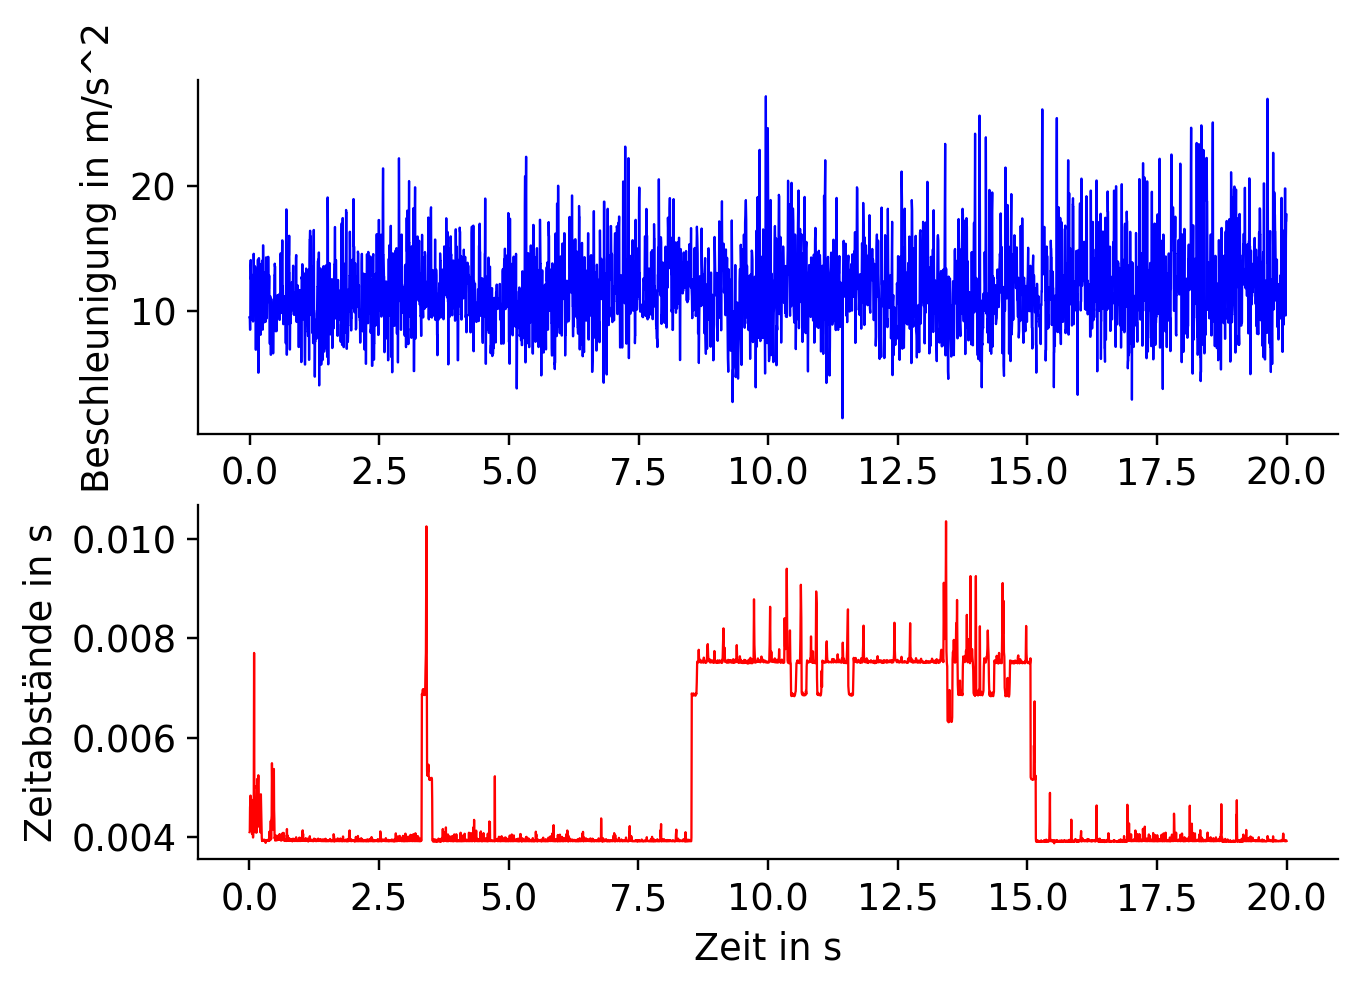

In [6]:
#ertellen von 2 subplots
fig,(ax1,ax2) = plt.subplots(2,1)

#plotten des ersten graphens der Beschleunigung über der zeit
ax1.plot(t,a_absolut, color="blue")
ax1.set_xlabel("Zeit in s")
ax1.set_ylabel("Beschleunigung in m/s^2")

#Berechnen der Zeitdifferenzen
diff = np.diff(t)
#Löschen des ersten eintrags des Zeit arrays damit die beiden Arrays zeit und differenzzeit die selbe dimension haben
t_1 = t[1:]

#plotten des zweiten graphens
ax2.plot(t_1,diff, color="red")
ax2.set_xlabel("Zeit in s")
ax2.set_ylabel("Zeitabstände in s")




#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
(new_time, new_data) = interpolation(t,a_absolut)
#plt.plot(new_time,new_data)
# acceleration.

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

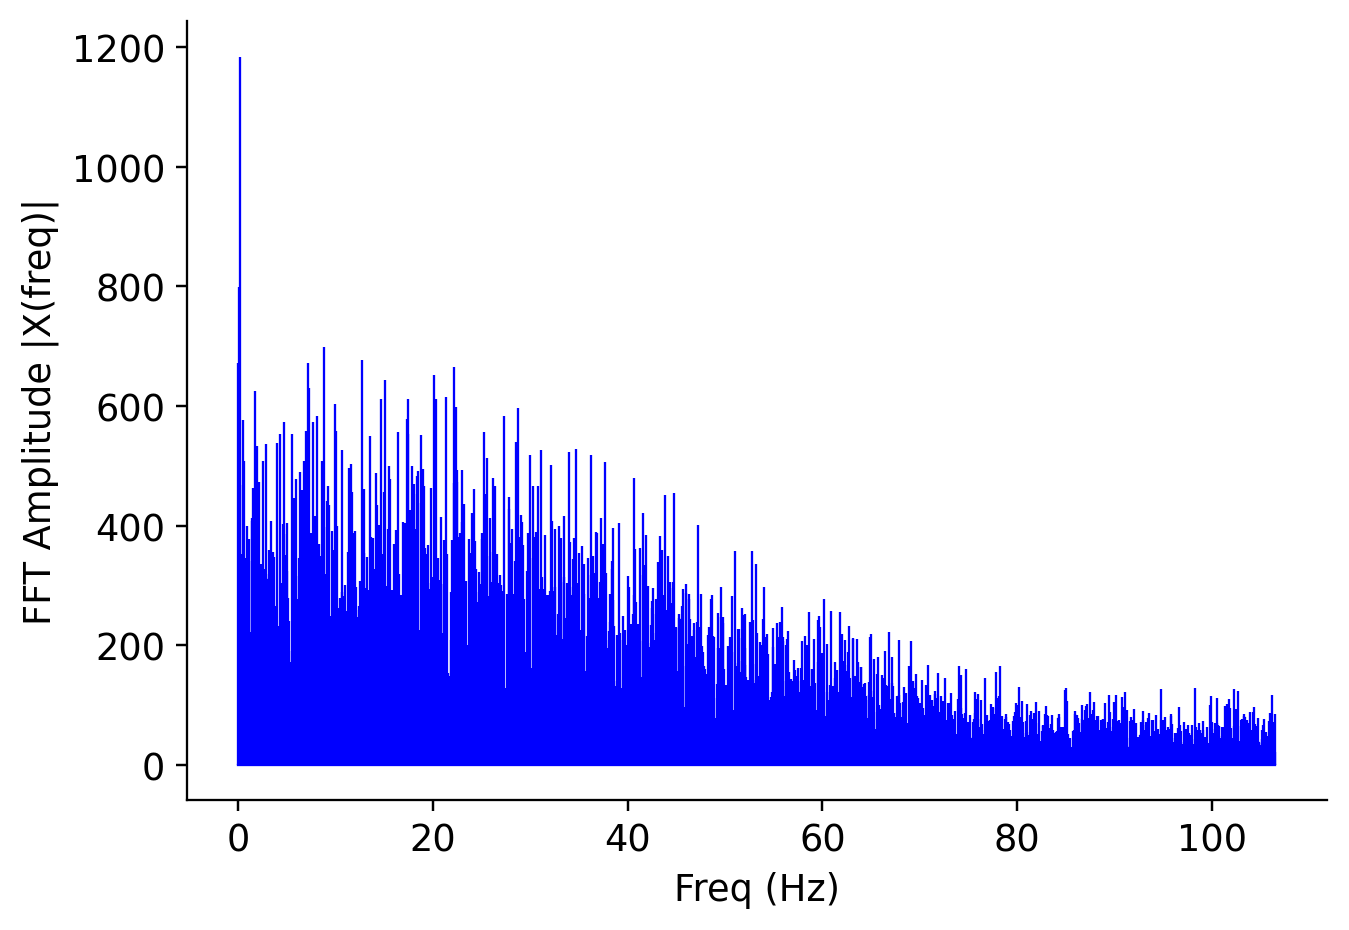

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

amplitude, freq = my_fft(new_data, new_time)

##plotten der fft nach dem in der aufgabenstellung verlinkten schema.
plt.stem(freq[1:], amplitude[1:], 'b', markerfmt=" ", basefmt="-b") #Der erste wert scheint irrational, weshalb ich diesen Wert 
#hier exludiere
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()
   
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/image0.jpeg" width="500">

- Beschreibung des Aufbaus: Ich habe den Beschleunigungssensor mit ein wenig Tesafilm an meinem Handy angebracht.

Hinweis: Auf dem Foto soll das iPad stellvertreten mein Handy darstellen, da ich mit meinem Handy das Foto aufnehmen musste.

Den Senosor habe ich wie zu beginn der Aufgabenstellung gefordert, ordnungsgemäß angeschlossen. Abschließend habe ich nach den Pi an den Strom, und an meinen Laptop angeschlossen.

- Vorgangsbeschreibung: Vor ausführen des "acceleration_measurement" Skripts, habe ich auf meinem Handy einen Klingelton abspielen lassen. Dann habe ich das Skript durchlaufen lassen und geawartet, bis mir das Skript ausgegeben hat, dass die Messdaten erfolgreich gespeichert wurden. Bis zu diesem Zeitpunkt habe ich den Klingelton abgespielt.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240109_150629_LeoMensler_phone" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240109_150629_LeoMensler_phone.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_150629_LeoMensler_phone/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_150629_LeoMensler_phone/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_150629_LeoMensler_phone/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaed13-361e-6ca6-8eb1-2cffd6da9cea": {
    "type": "probe",
    "name": "phone",
    "comment": "",
    "path": "measurement_data/data_2024010

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
#erstellen eines zusammengesetzten Strings
path = path_measurement_folder + "/" + h5_file_name


#Füllen der Arrays mit werten aus der HDF5 Datei
with h5py.File(path, "r") as f:
    
    a_x = np.array(f["RawData"]["acceleration_x"])
    a_y = np.array(f["RawData"]["acceleration_y"])
    a_z = np.array(f["RawData"]["acceleration_z"])
    t = np.array(f["RawData"]["timestamp"])
   

#### 2. Betrag der Beschleunigung berechnen


In [11]:
a_absolut = get_vec_accel(a_x,a_y,a_z)

print(a_absolut)

[10.753813386237432, 10.753813386237432, 10.68188647880908, 10.68188647880908, 10.509874238191177, 10.509874238191177, 10.562158132893464, 10.578462037616857, 10.578462037616857, 10.566018025257586, 10.55501725539976, 10.006243571976908, 10.006243571976908, 12.768363747414039, 12.768363747414039, 10.567838239855739, 10.567838239855739, 10.657081070884447, 10.657081070884447, 10.491263987771653, 10.491263987771653, 10.242049485215732, 10.055255164838933, 10.055255164838933, 10.777039869276551, 10.777039869276551, 10.782749484050028, 10.782749484050028, 10.73870714419963, 10.2430259736821, 10.2430259736821, 10.430145666887496, 10.430145666887496, 10.430145666887496, 10.918391344701995, 10.918391344701995, 10.588711888993249, 10.72967621292887, 10.72967621292887, 10.24505376772178, 10.24505376772178, 10.705987670719448, 10.535829548971376, 10.535829548971376, 10.329936150867093, 10.329936150867093, 10.700165194409125, 10.597645152780727, 10.597645152780727, 10.277144617775209, 10.27714461

#### 3. Darstellung der Messdaten

Text(0, 0.5, 'Zeitabstände in s')

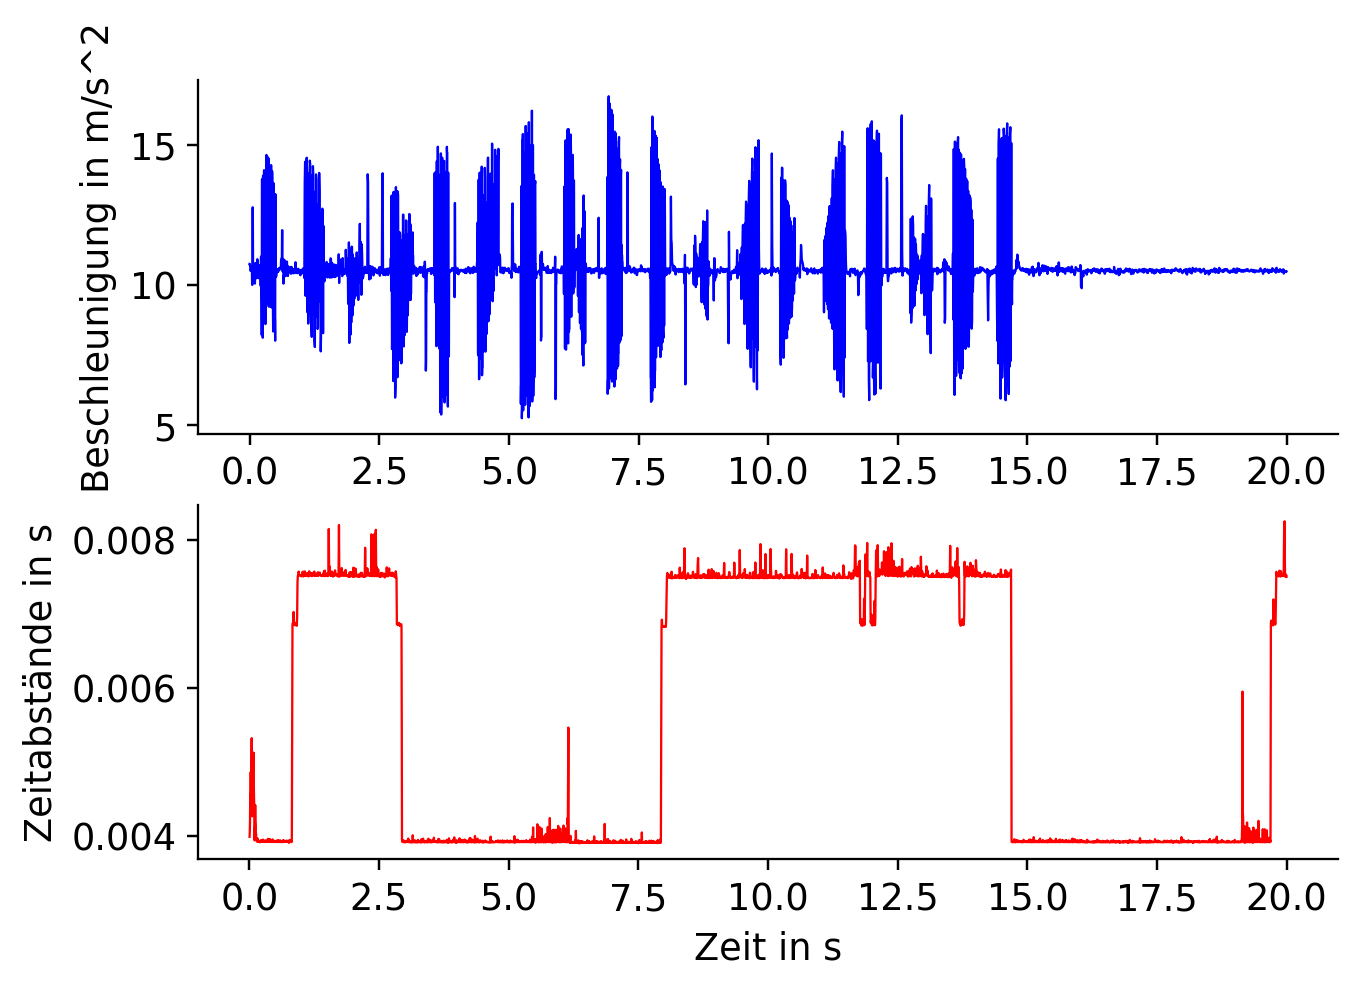

In [12]:
#erstellen zweier subplots
fig,(ax1,ax2) = plt.subplots(2,1)

#plotten des ersten graphens
ax1.plot(t,a_absolut, color="blue")
ax1.set_xlabel("Zeit in s")
ax1.set_ylabel("Beschleunigung in m/s^2")

#berechnen der zeitabstände
diff = np.diff(t)
#löschen des ersten eintrags des zeit-arrays, damit die beiden arrays die gleiche dimension haben.
t_1 = t[1:]

#plotten des zweiten graphens
ax2.plot(t_1,diff, color="red")
ax2.set_xlabel("Zeit in s")
ax2.set_ylabel("Zeitabstände in s")


#### 4. Interpolation der Messwerte



In [13]:
(new_time, new_data) = interpolation(t,a_absolut)

#### 5 & 6. FFT durchführen und graphisch darstellen


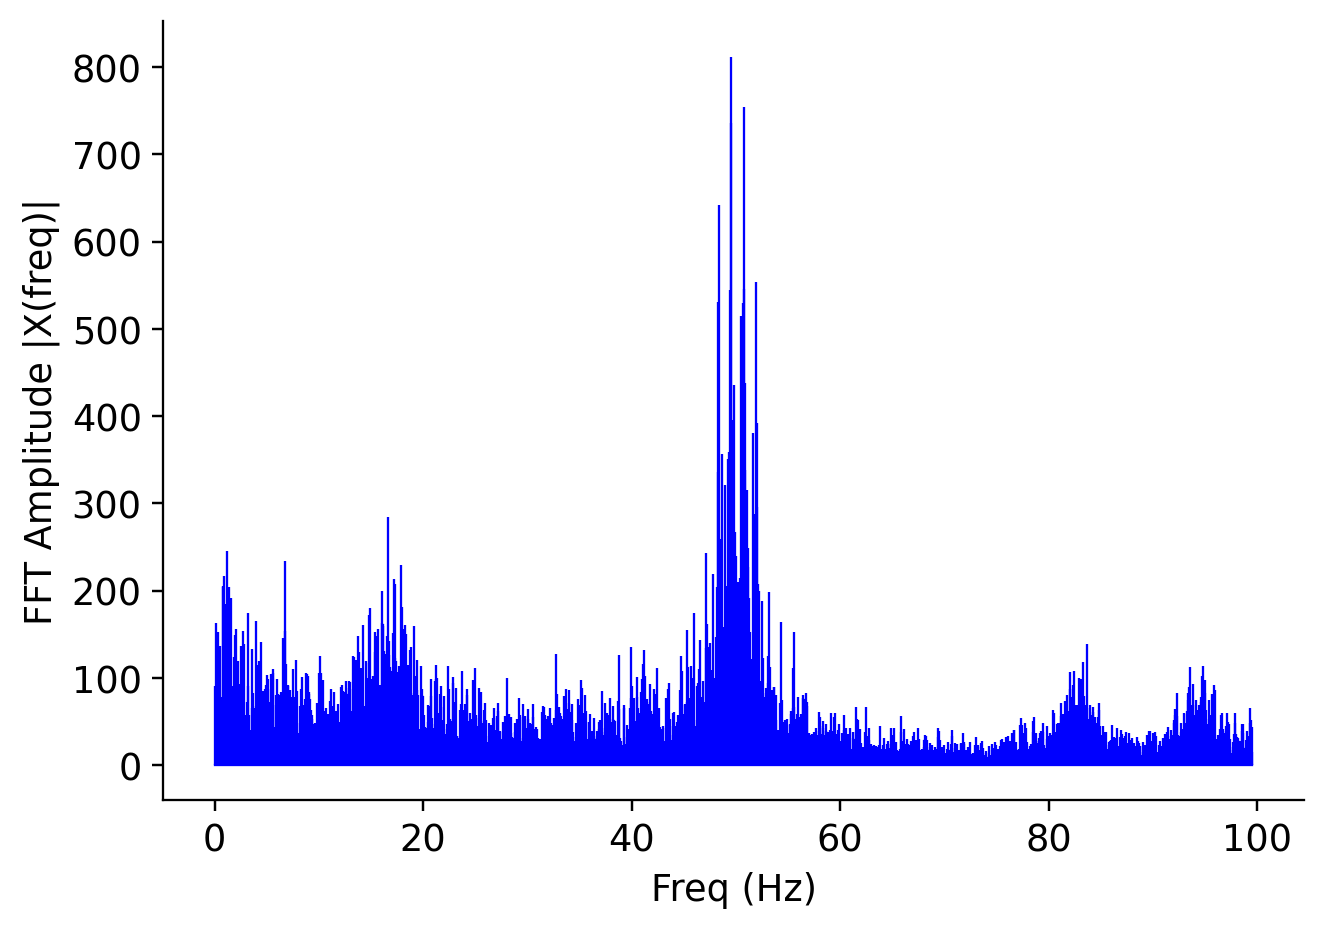

In [14]:
amplitude, freq = my_fft(new_data, new_time)

#plotten der fft nach dem in der aufgabenstellung verlinkten schema.
plt.stem(freq[1:], amplitude[1:], 'b', markerfmt=" ", basefmt="-b") #Der erste wert scheint irrational, weshalb ich diesen Wert 
#hier exludiere
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## Diskussion
Die Ergebnisse zeigen deutlich das zu erwartende, unterschiedliche Frequenzspektrum der beiden Gegenstände. Bei der Bohrmaschine lässt sich erkennen, dass mit zunehmender Frequenz die Amplitude der Schwingung geringer wird. Das könnte daran liegen, dass die Bohrmaschine bei konstanter Drehzahl lediglich ein Rauschen bei höheren Frequenzen aufweist.

Anders ist das beim Klingelton meines Handys. Man kann schön erkennen, dass sich ein Haupt- und mehrere Nebenmaxima im Frequenzspektrum ausbilden. Grund hierfür ist, dass das Handy in verschiedenen Stufen während des Klingeltons vibriert. Diese Vibrationen laufen jedoch vermutlich definierter und ohne viel Überlagerung anderer Faktoren ab, weshalb sich verschiedene Maxima ausbilden.


## Fazit
Fazit: Ich habe zum ersten Mal mit einem Beschleunigungssensor gearbeitet, was sowohl spannend als auch lehrreich war. Es hat mir Freude bereitet, die gemessenen Daten zu visualisieren und daraus Erkenntnisse abzuleiten. Dabei konnte ich meine Programmierfähigkeiten weiter ausbauen und bin nun sicherer im Umgang mit GitLab sowie JupyterHub. Ein weiterer wichtiger Lernaspekt war die Bedeutung von variablen Pfadnamen. Ich habe erkannt, wie viel Zeit man sich sparen kann, wenn man bei Änderungen am Versuchsgegenstand anpassungsfähige Strukturen verwendet.